In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os, sys 

## Looking at distribution of posts per day

In [1]:
submissions = os.listdir('../../Files/Submissions/')
try:
    submissions.pop(submissions.index('.DS_Store'))
except ValueError:
    pass


In [16]:
comments = os.listdir('../../Files/Comments')
try:
    comments.pop(comments.index('.DS_Store'))
except ValueError:
    pass


In [7]:
submissions_train = os.listdir('../../Files/Submissions/train/')
try:
    submissions_train.pop(submissions_train.index('.DS_Store'))
except ValueError:
    pass

In [18]:
subs = pd.read_pickle('subreddits_picked_sm.pickle')

In [19]:
subs.sort_values(by='subscribers', ascending=False).head(40).subscribers.sum()

475876139

In [20]:
subs.sort_values(by='subscribers', ascending=False).head(40).subreddit

44                AskReddit
195                     aww
116               worldnews
27                     pics
257           todayilearned
251                 science
26              nottheonion
24        mildlyinteresting
6                     memes
128         dataisbeautiful
87            UpliftingNews
86               Futurology
253              technology
261          wallstreetbets
262          wholesomememes
21        interestingasfuck
229                politics
203      NatureIsFuckingLit
76          oddlysatisfying
104              Unexpected
120                     WTF
112        nextfuckinglevel
157        Whatcouldgowrong
19                 facepalm
22                   me_irl
16              MadeMeSmile
0                 dankmemes
52       BlackPeopleTwitter
13     Damnthatsinteresting
315                  bestof
23        mildlyinfuriating
187    WatchPeopleDieInside
10       trippinthroughtime
51      BikiniBottomTwitter
124          instant_regret
49           PublicF

In [21]:
subs['Comments'] = 0
subs['Submissions'] = 0

In [22]:

subs = pd.read_pickle('subreddits_picked.pickle')
subs['Comments'] = 0
for i in comments:
    subs.loc[subs['subreddit'] == i[:-7], 'Comments'] = 1
submission_df = subs.groupby('Comments').sum()
submission_df

,degree_centrality,closeness_centrality,degree,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%,subscribers,component
Comments,,,,,,,,,,
0,2.357995,128.757647,1976,81460.0,11373.0,1090005.0,27.850480,1.970271,1038270825,110
1,0.149165,3.936936,125,8498.0,178.0,29304.0,4.222689,0.094550,1121620,0


In [3]:
def plot_frequency( folder,lists):
    for i in lists:
        df = pd.read_pickle(os.path.join('../../Files/'+ folder + i))
        df['created'] = pd.to_datetime(df['created_utc'], unit='s').dt.date
        df2 = df.groupby(by='created').count()
        plt.plot(df2)

        # Labelling 
        plt.xlabel("Date")
        plt.ylabel("number of posts")
        plt.title(f"Subreddit:{i}")

        # Display
        plt.show()

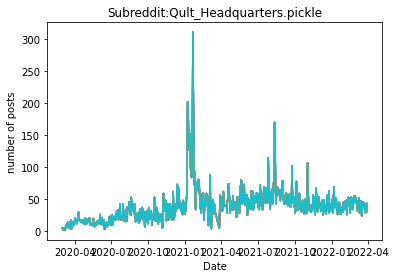

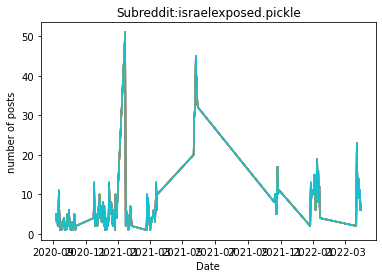

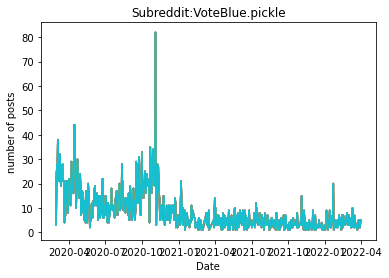

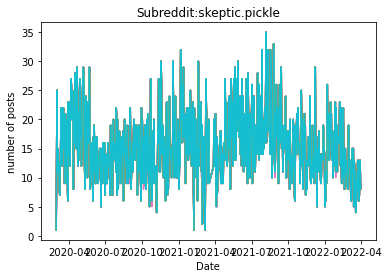

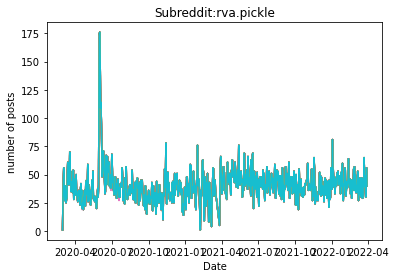

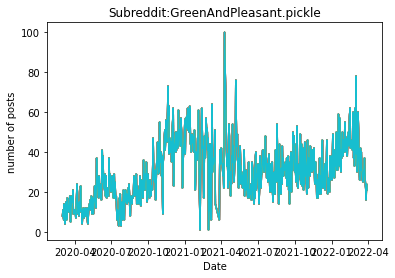

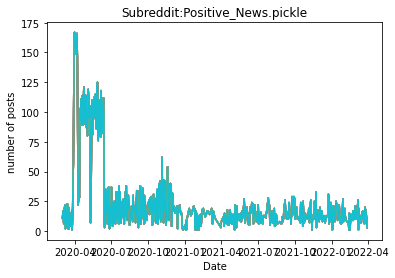

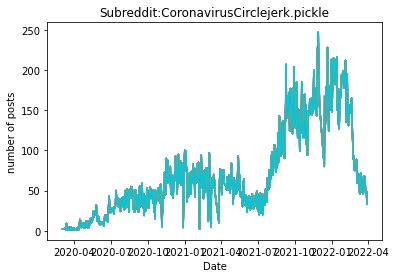

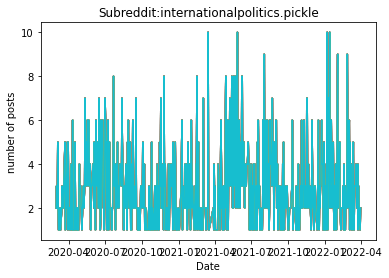

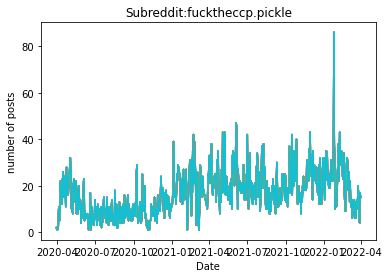

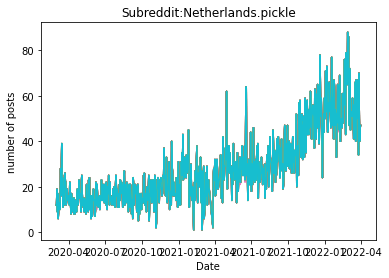

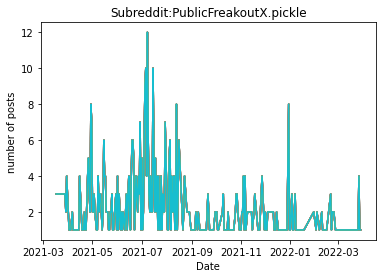

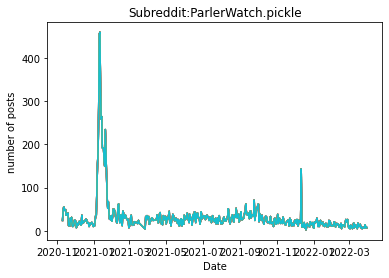

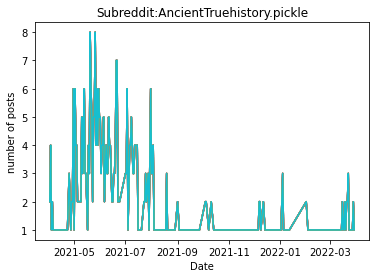

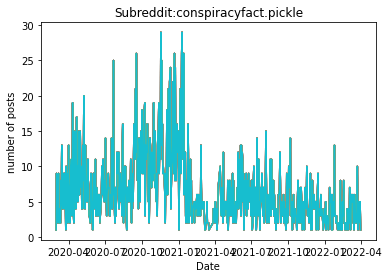

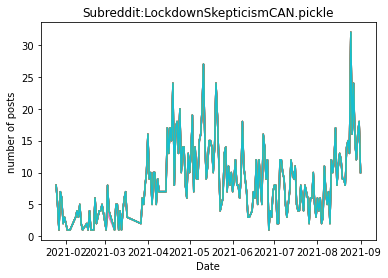

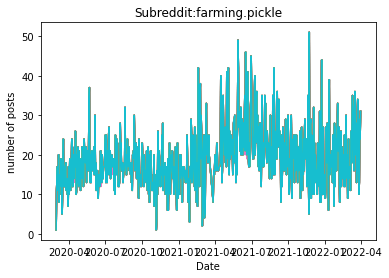

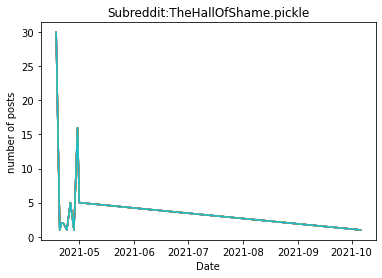

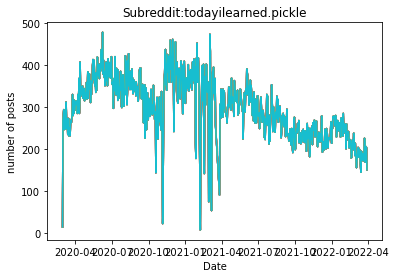

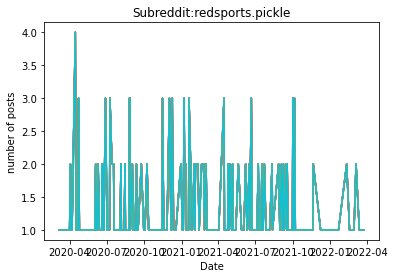

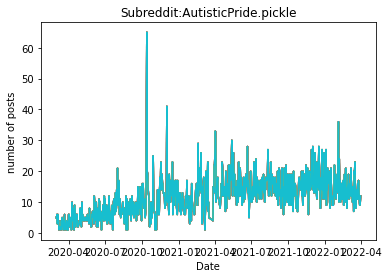

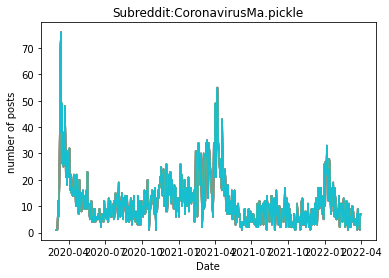

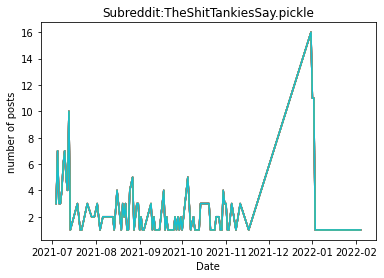

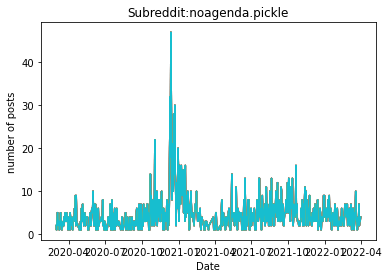

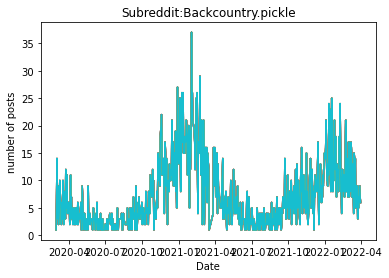

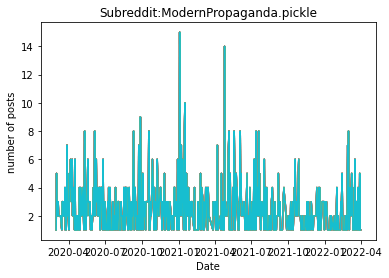

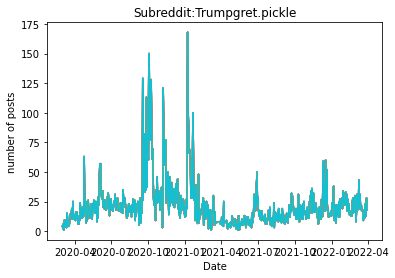

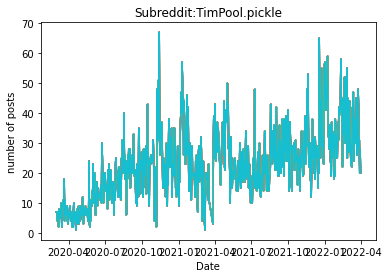

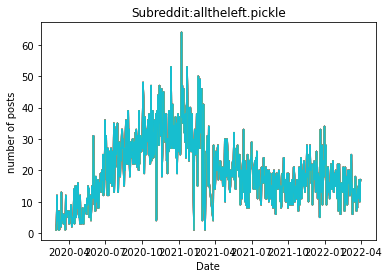

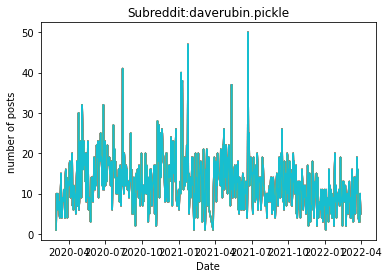

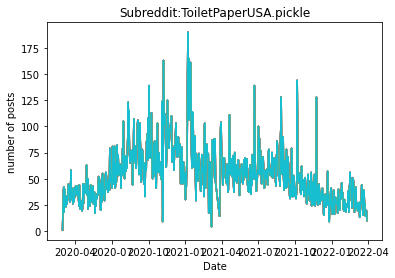

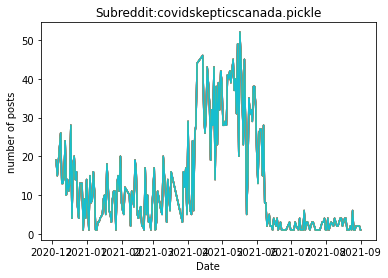

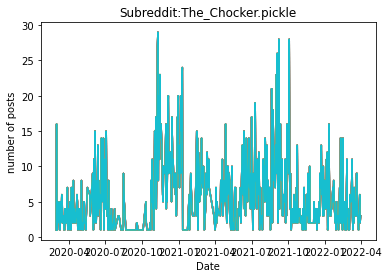

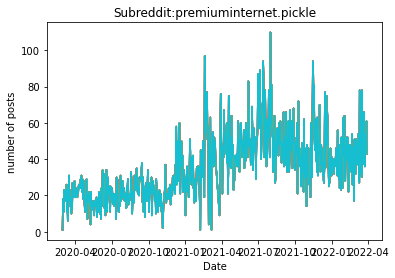

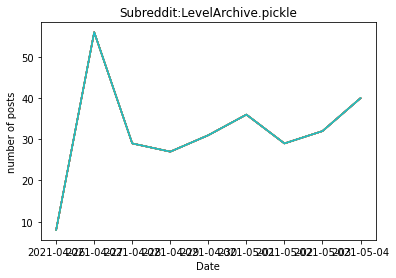

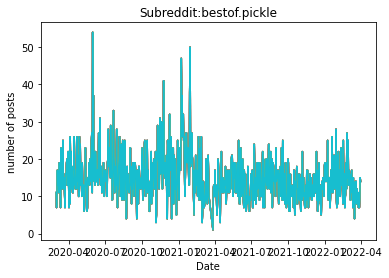

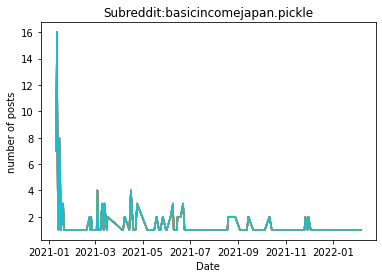

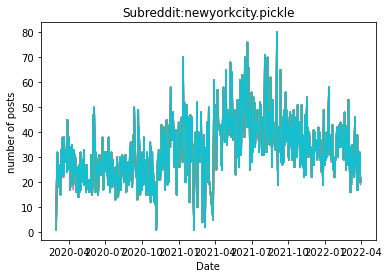

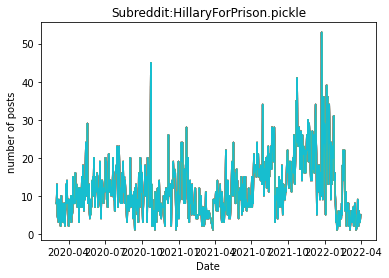

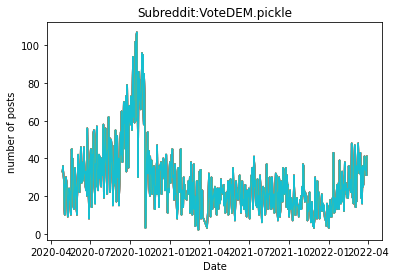

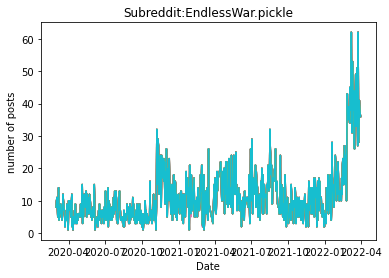

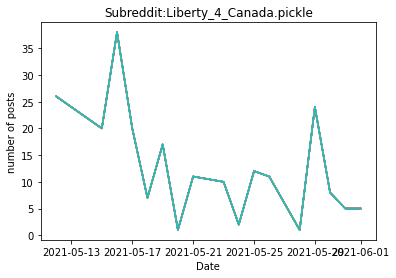

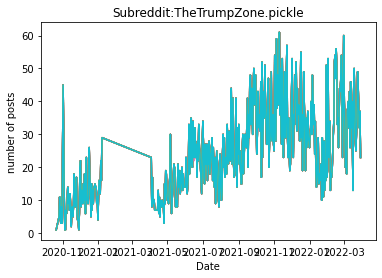

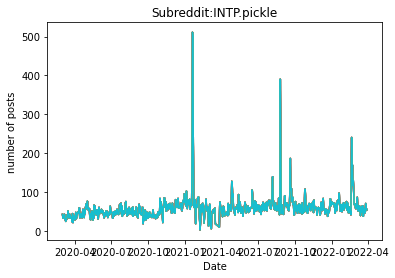

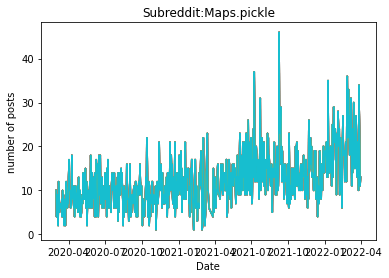

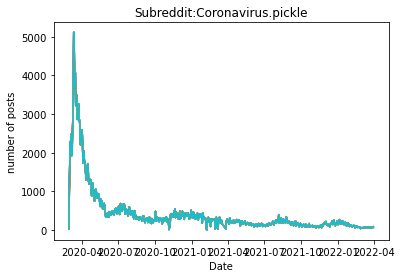

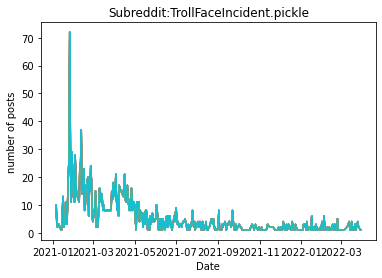

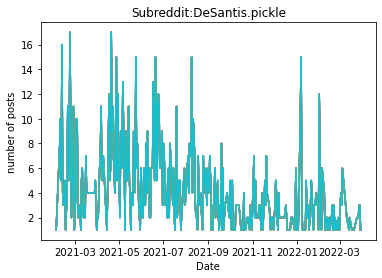

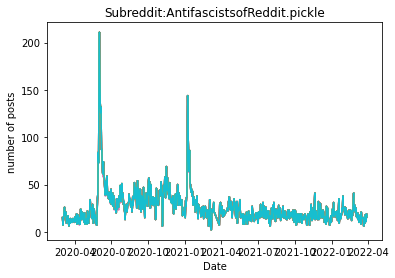

IsADirectoryError: [Errno 21] Is a directory: '../../Files/Submissions/temp'

In [6]:
plot_frequency('Submissions/', submissions)

## Creating a training dataset

In [ ]:
submissions_train = os.listdir('../../Files/Submissions/train/')
try:
    submissions_train.pop(submissions_train.index('.DS_Store'))
except ValueError:
    pass

In [9]:
submissions_train

['covidskepticscanada.pickle',
 'Coronavirus.pickle',
 'TrueAntiVaccination.pickle',
 'NoNewNormal.pickle',
 'CovidSheepWatch.pickle',
 'EndTheLockdowns.pickle',
 'Vaccine.pickle',
 'ParentingWithoutFear.pickle',
 'aww.pickle',
 'ivermectin.pickle',
 'FUCKCHINAVIRUS.pickle',
 'CoronavirusVariants.pickle',
 'antivax.pickle',
 'Covid19VaccineRats.pickle',
 'DebateVaccine.pickle',
 'CovIdiots.pickle',
 'VaccineEnvy.pickle',
 'DebateVaccines.pickle',
 'VACCINES.pickle',
 'vaccinesideeffects.pickle',
 'YouWillSurviveIt.pickle',
 'CovidVaccinated.pickle',
 'submission_train.pickle',
 'CoronaVirus_2019_nCoV.pickle',
 'CovidIsACult.pickle',
 'CoronaVaccines.pickle',
 'submission_train_sm.pickle',
 'VaccineDiscussion.pickle',
 'IVMScience.pickle',
 'vacci_nation.pickle',
 'CovidVaccineInjury.pickle',
 'CoronaBumpers.pickle']

In [90]:
for i in os.listdir('../../Files/Submissions/train/'):
    df01 = pd.read_pickle(os.path.join('../../Files/Submissions/train/'+ i))
    print(i, len(df01))

covidskepticscanada.pickle 3062
Coronavirus.pickle 316400
TrueAntiVaccination.pickle 4394
NoNewNormal.pickle 109292
CovidSheepWatch.pickle 157
EndTheLockdowns.pickle 1841
Vaccine.pickle 2775
ParentingWithoutFear.pickle 216
aww.pickle 1251041
ivermectin.pickle 9027
FUCKCHINAVIRUS.pickle 171
CoronavirusVariants.pickle 437
antivax.pickle 4047
Covid19VaccineRats.pickle 574
DebateVaccine.pickle 1106
CovIdiots.pickle 33112
VaccineEnvy.pickle 277
DebateVaccines.pickle 16515
VACCINES.pickle 4236
vaccinesideeffects.pickle 467
YouWillSurviveIt.pickle 725
CovidVaccinated.pickle 26721
CoronaVirus_2019_nCoV.pickle 9446
CovidIsACult.pickle 115
CoronaVaccines.pickle 307
VaccineDiscussion.pickle 2068
IVMScience.pickle 144
vacci_nation.pickle 1899
CovidVaccineInjury.pickle 947
CoronaBumpers.pickle 2847


In [144]:
# 1 is anti vaccine, 2 is pro vaccine, 0 is noise
train_label = {
    'CovidIsACult' : 1,
    'covidskepticscanada': 1,
    'FUCKCHINAVIRUS' : 1,
    'ParentingWithoutFear': 1,
    'TrueAntiVaccination': 1,
    'vaccinesideeffects' : 1,
    'vacci_nation' : 1,
    #Additionally, 20k samples from r/NoNewNormal

    'CoronaVaccines' : 2,
    'CovidVaccinated' : 2,
    'Vaccines': 2,
    'YouWillSurviveIt' : 2,
}

noise_label = {
    'aww': 0,
    'KidsAreFuckingStupid': 0,
    'natureismetal': 0,
}


# unsure: ivermectin: 1, CoronavirusVariants, antivax: 2, Covid19VaccineRats, DebateVaccine, CovIdiots, VaccineEnvy, DebateVaccines, Coronavirus  2# 'NoNewNormal': 1,

In [145]:
df = pd.DataFrame()
for key in train_label:
    temp = pd.read_pickle(os.path.join('../../Files/Submissions/train/'+key+'.pickle'))
    print(key, len(temp))
    df = pd.concat([df, temp])

# df['label'] = df.subreddit.map(train_label)

CovidIsACult 115
covidskepticscanada 3062
FUCKCHINAVIRUS 171
ParentingWithoutFear 216
TrueAntiVaccination 4394
vaccinesideeffects 467
vacci_nation 1899
CoronaVaccines 307
CovidVaccinated 26721
Vaccines 4236
YouWillSurviveIt 725


In [146]:
df2 = pd.DataFrame()
for key in noise_label:
    
    temp = pd.read_pickle(os.path.join('../../Files/Submissions/train/'+key+'.pickle'))
    print(key, len(temp))
    df2 = pd.concat([df2, temp])


aww 1251041
KidsAreFuckingStupid 52807
natureismetal 37221


In [147]:
len(df)

42313

In [148]:
df5 = pd.read_pickle('../../Files/Submissions/train/NoNewNormal.pickle')

In [150]:
df5 = df5.sample(n=20000)
df5['label'] = 1


In [152]:


df3 = df2.sample(n=30000)
df3['label'] = df3.subreddit.map(noise_label)
df['label'] = df.subreddit.map(train_label)

In [153]:

df4 = pd.concat([df, df3, df5])

In [154]:

df4.groupby(by='label').count()

,author,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url
label,,,,,,,,,,
0.0,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
1.0,30324,30324,30324,30324,30324,30324,30279,30324,30324,30324
2.0,27753,27753,27753,27753,27753,27753,27627,27753,27753,27753


In [155]:
df4.groupby(by='subreddit').count()

,author,created_utc,id,num_comments,permalink,score,selftext,title,url,label
subreddit,,,,,,,,,,
CoronaVaccines,307,307,307,307,307,307,307,307,307,307
CovidIsACult,115,115,115,115,115,115,115,115,115,115
CovidVaccinated,26721,26721,26721,26721,26721,26721,26596,26721,26721,26721
FUCKCHINAVIRUS,171,171,171,171,171,171,171,171,171,171
KidsAreFuckingStupid,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
NoNewNormal,20000,20000,20000,20000,20000,20000,19959,20000,20000,20000
ParentingWithoutFear,216,216,216,216,216,216,216,216,216,216
TrueAntiVaccination,4394,4394,4394,4394,4394,4394,4394,4394,4394,4394
VACCINES,4236,4236,4236,4236,4236,4236,4224,4236,4236,0


<AxesSubplot:>

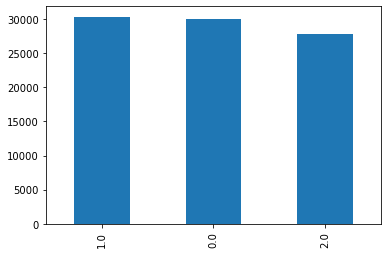

In [156]:
df4['label'].value_counts().plot(kind='bar')

<AxesSubplot:>

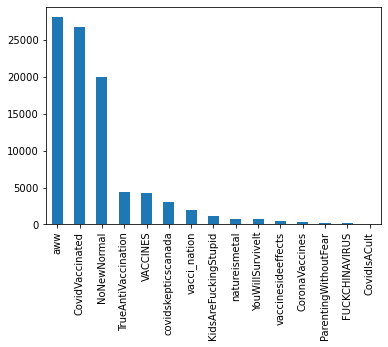

In [157]:
df4['subreddit'].value_counts().plot(kind='bar')

In [158]:
df4.to_pickle('../../Files/Submissions/train/submission_train_sm_v2.pickle')

In [139]:
df4.head()

,author,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,label
0,Backrounded,1609209899,km5as7,0,/r/covidskepticscanada/comments/km5as7/warming...,1,,covidskepticscanada,WARMINGTON: COVID-19 the 'nail in the coffin' ...,https://torontosun.com/news/local-news/warming...,1.0
1,Backrounded,1609188289,klylkj,0,/r/covidskepticscanada/comments/klylkj/foothil...,1,,covidskepticscanada,Foothills hospital is OVERFLOWING! Just like o...,https://www.bitchute.com/video/JOeuJIi65SHw/,1.0
2,Backrounded,1609188049,klyiqu,0,/r/covidskepticscanada/comments/klyiqu/listen_...,1,,covidskepticscanada,Listen to the experts! Until they contradict y...,https://archive.is/SYIJl,1.0
3,Backrounded,1609187645,klye52,0,/r/covidskepticscanada/comments/klye52/ontario...,1,,covidskepticscanada,"Ontario pastor ""charged"" for holding services....",https://i.redd.it/596h5yxdnz761.jpg,1.0
4,Backrounded,1609148202,klnfx6,0,/r/covidskepticscanada/comments/klnfx6/looking...,1,,covidskepticscanada,Looking to escape this godforesaken country wi...,https://torontosun.com/news/local-news/warming...,1.0


In [162]:
df4.subreddit.drop_duplicates().to_csv('../../Files/Comments/priorityPull.csv')

['CovidIsACult',
 'covidskepticscanada',
 'FUCKCHINAVIRUS',
 'ParentingWithoutFear',
 'TrueAntiVaccination',
 'vaccinesideeffects',
 'vacci_nation',
 'CoronaVaccines',
 'CovidVaccinated',
 'VACCINES',
 'YouWillSurviveIt',
 'aww',
 'KidsAreFuckingStupid',
 'natureismetal',
 'NoNewNormal']